# Financial Dataset EDA and Fraud Detection

This Jupyter Notebook comprises of EDA of a Dataset with an implementation of  neural network model and a Decision Tree Classifier for fraud prediction prediction. The dataset consist of transaction information with more than 6 million entries. The dataset which is being utilized synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
data = pd.read_csv('../input/paysim1/PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**EDA**

In [3]:
data['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [4]:
data['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [5]:
#Dimensions of the Dataset
data.shape

(6362620, 11)

In [6]:
#Columns in the Dataset
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
#Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
#Analyzing no of Frauds and no Frauds
NoFraud = len(data[data['isFraud'] == 0])
Fraud = len(data[data['isFraud'] == 1])
print("Percentage of No Fraud: {:.2f}%".format((NoFraud / (len(data['isFraud']))*100)))
print("Percentage of Fraud: {:.2f}%".format((Fraud / (len(data['isFraud']))*100)))

Percentage of No Fraud: 99.87%
Percentage of Fraud: 0.13%


In [10]:
#Checking if the dataset has any null/missing values or not
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

So, throughout the dataset there are no null values present.

**Correlation Heatmap**

<AxesSubplot:>

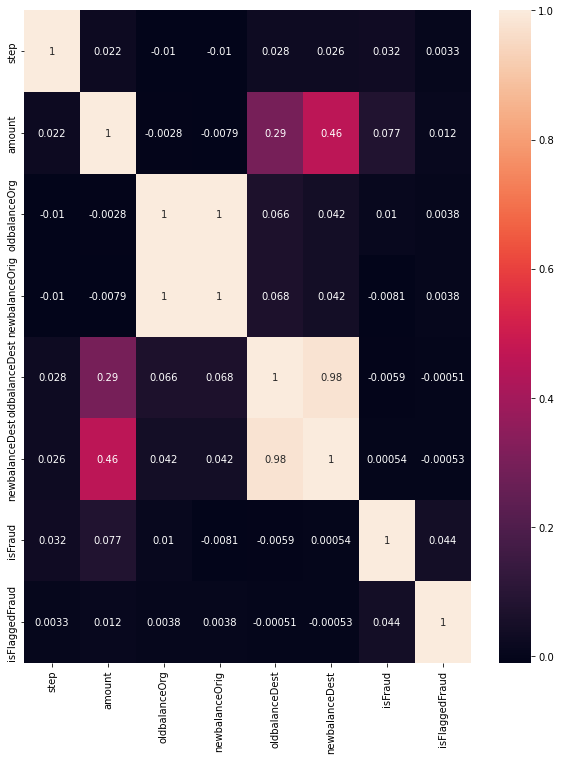

In [11]:
plt.figure(figsize = (10, 12))
sns.heatmap(data.corr(), annot = True)

In [12]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

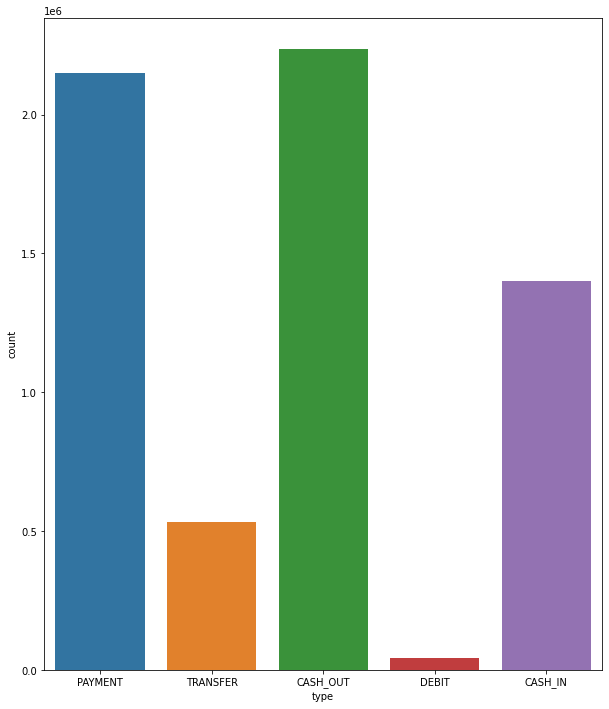

In [13]:
plt.figure(figsize = (10, 12))
sns.countplot(data['type'])

**No of Transactions of each type**

<AxesSubplot:xlabel='type', ylabel='count'>

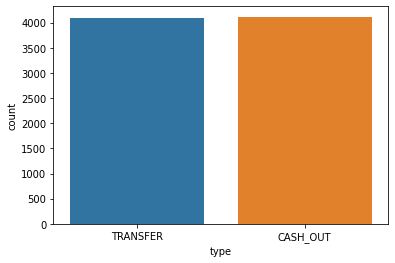

In [14]:
sns.countplot(data[data['isFraud'] == 1]['type'])

Therefore. it is evident that whenever a fraud takes place, the transaction type are 'Transfer' and 'Cash Out'

In [15]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Object = data[['type', 'nameOrig', 'nameDest']]
for i in Object:
    data[i] = le.fit_transform(data[i])
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [17]:
#Data info after update
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB


<AxesSubplot:xlabel='amount', ylabel='Density'>

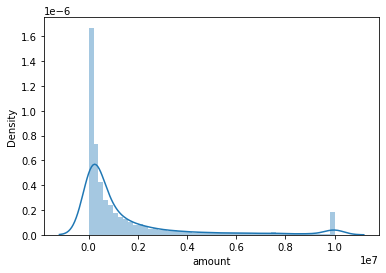

In [18]:
#Amount Distribution when Fraud Takes Place
sns.distplot(data[data['isFraud'] == 1]['amount'])

In [19]:
data[data['isFraud'] == 1]['nameDest'].value_counts()

57504     2
11957     2
296180    2
147473    2
178026    2
         ..
370402    1
348099    1
15781     1
299819    1
534595    1
Name: nameDest, Length: 8169, dtype: int64

In [20]:
numerical = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

**OUTLIER DETECTION**

In [21]:
from collections import Counter

def detect_outliers(data,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_columns = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_columns)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [22]:
data.loc[detect_outliers(data,numerical)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
94,1,4,1724887.05,1627280,0.0,0.00,174831,3470595.10,19169204.93,0,0
96,1,4,581294.26,5838793,0.0,0.00,174831,5195482.15,19169204.93,0,0
289,1,1,691738.36,1688425,0.0,0.00,174831,6285707.02,19169204.93,0,0
358,1,4,1538200.39,4631291,0.0,0.00,174831,6977445.38,19169204.93,0,0
359,1,4,2421578.09,206121,0.0,0.00,174831,8515645.77,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356167,709,0,423698.68,2481658,37386.0,461084.68,343854,4089097.88,3665399.21,0,0
6356631,710,0,409659.76,3007615,61870.0,471529.76,344188,3983273.45,3573613.69,0,0
6356839,710,0,308172.00,3378815,149018.0,457190.00,383488,3461432.21,3153260.20,0,0
6359744,715,0,287886.12,874638,227422.0,515308.12,35512,7004998.18,6717112.06,0,0


In [23]:
#Removing outliers from the dataset
data = data.drop(detect_outliers(data,numerical),axis = 0).reset_index(drop = True)

**Scatterplot Heatmap**

<Figure size 864x864 with 0 Axes>

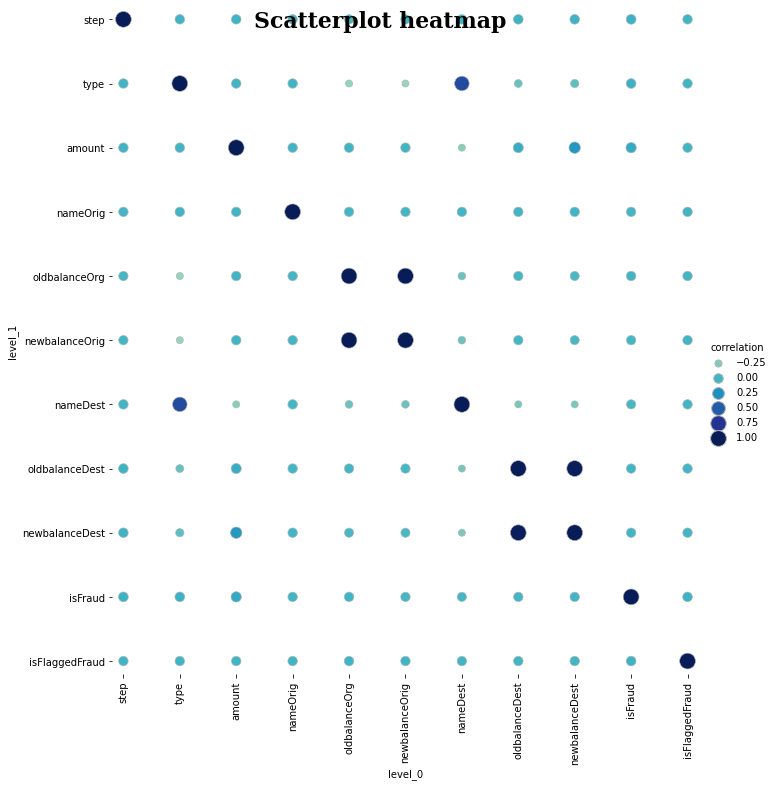

In [24]:
fig = plt.figure(figsize=(12,12))
corr_mat = data.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

In [25]:
X = data.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis  = 1)
y= data['isFraud']

In [26]:
numerical = [feature for feature in X.columns if X[feature].dtype == 'int64' or X[feature].dtype == 'float64']
numerical

['step',
 'type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

**Scaling the dataset**

In [27]:
scaler = RobustScaler()
X[numerical] = scaler.fit_transform(X[numerical])

**First Five rows of the scaled dataset.**

In [28]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-1.324022,1.0,-0.307719,1.684490,1.442503,-0.114646,-0.187985
1,-1.324022,1.0,-0.351406,0.098612,0.174443,-0.114646,-0.187985
2,-1.324022,1.5,-0.360627,-0.125795,0.000000,-0.114646,-0.187985
3,-1.324022,0.0,-0.360627,-0.125795,0.000000,-0.085671,-0.187985
4,-1.324022,1.0,-0.297703,0.314892,0.268942,-0.114646,-0.187985


In [29]:
#Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (4824844, 7)
The shape of X_test is        (1206211, 7)
The shape of y_train is       (4824844,)
The shape of y_test is        (1206211,)


**Building Neural Network**

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#Building Neural Network
model = Sequential()

# 1st layer: input_dim=6, 12 nodes, RELU
model.add(Dense(12, input_dim=7, kernel_initializer='random_uniform', activation='relu'))

model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(rate=0.1))

model.add(Flatten())
model.add(Dense(512, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(rate=0.1))



model.add(Flatten())
model.add(Dense(512, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(rate=0.1))


# output layer: dim=1, activation sigmoid
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid' ))

# Compile the model
model.compile(loss='binary_crossentropy',   
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

2022-06-13 12:58:46.413058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                96        
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               6656      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2

2022-06-13 12:58:46.566383: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 12:58:46.567168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 12:58:46.568317: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-13 12:58:46.568645: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [31]:
model.fit(X_train, y_train, batch_size=100, epochs=2)

2022-06-13 12:58:49.992350: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
48249/48249 [==============================] - 148s 3ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 2/2
48249/48249 [==============================] - 149s 3ms/step - loss: 0.0050 - accuracy: 0.9996


In [32]:
Y_pred = model.predict(X_test)

**Implementing Decision Tree Classifier**

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
DecisionTree = DecisionTreeClassifier()
fit = DecisionTree.fit(X_train, y_train)
prediction = DecisionTree.predict(X_test)


In [35]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
CM = confusion_matrix(y_test,prediction)
CR = classification_report(y_test,prediction)
fpr, recall, thresholds = roc_curve(y_test, prediction)
AUC = auc(fpr, recall)

<AxesSubplot:>

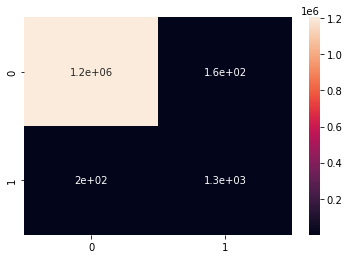

In [36]:
sns.heatmap(CM, annot = True)

In [37]:
print('Classification Report:')
print(CR)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1204756
           1       0.89      0.86      0.87      1455

    accuracy                           1.00   1206211
   macro avg       0.94      0.93      0.94   1206211
weighted avg       1.00      1.00      1.00   1206211



In [38]:
print("Area Under Curve:")
print(AUC)

Area Under Curve:
0.9305173739305543


In [39]:
print("Accuracy Score:",accuracy_score(y_test, prediction))

Accuracy Score: 0.9996990576275627
